# Alumno: Gerardo de Miguel González

## Práctica Extreme Learning Machines

## 1 Bibliotecas de trabajo

In [1]:
#::GMG::Instalamos un paquete de ELM para R
#
#::nota::en CRAN elmNN ha sido descatalogado y existen alternativas como las
#        instaladas aquí
#
# https://github.com/mlampros/elmNNRcpp
# https://rdrr.io/cran/elmNNRcpp/man/elm_predict.html
# https://cran.r-project.org/web/packages/elmNNRcpp/index.html
# https://cran.r-project.org/web/packages/elmNNRcpp/vignettes/extreme_learning_machine.html
# http://mlampros.github.io/2018/07/05/the_extreme_learning_machine_package/
#
#install.packages('elmNNRcpp')
#
# >Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.4’
# >(as ‘lib’ is unspecified)
# > also installing the dependencies ‘KernelKnn’, ‘RcppArmadillo’
library('elmNNRcpp')

Loading required package: KernelKnn


In [2]:
#::GMG::Paquete alternativo en CRAN propuesto por el profesor 
#
# https://cran.r-project.org/web/packages/ELMR/index.html
# https://cran.r-project.org/web/packages/ELMR/ELMR.pdf
#
# >Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.4’
# >(as ‘lib’ is unspecified)
#install.packages('ELMR')
library('ELMR')

In [7]:
#install.packages('dslabs')
# https://rdrr.io/cran/dslabs/
# https://github.com/rafalab/dslabs
# https://www.rdocumentation.org/packages/dslabs/versions/0.5.2
# https://cran.r-project.org/web/packages/dslabs/index.html
# https://cran.r-project.org/web/packages/dslabs/dslabs.pdf
library('dslabs')

## 2 Datasets

### Dataset Circle 

In [3]:
#::GMG::Cargo los datos
circle <- read.csv("data/circle.csv")

In [4]:
#::GMG::Nombro las columnas de características
colnames(circle) <- c("x1","x2","y")

In [5]:
#::GMG::Describo los datos
str(circle)

'data.frame':	99 obs. of  3 variables:
 $ x1: num  -0.553 -0.0949 -0.8096 0.399 -0.6736 ...
 $ x2: num  -0.577 -0.299 0.857 0.69 -0.684 ...
 $ y : int  0 1 0 0 0 0 0 0 0 0 ...


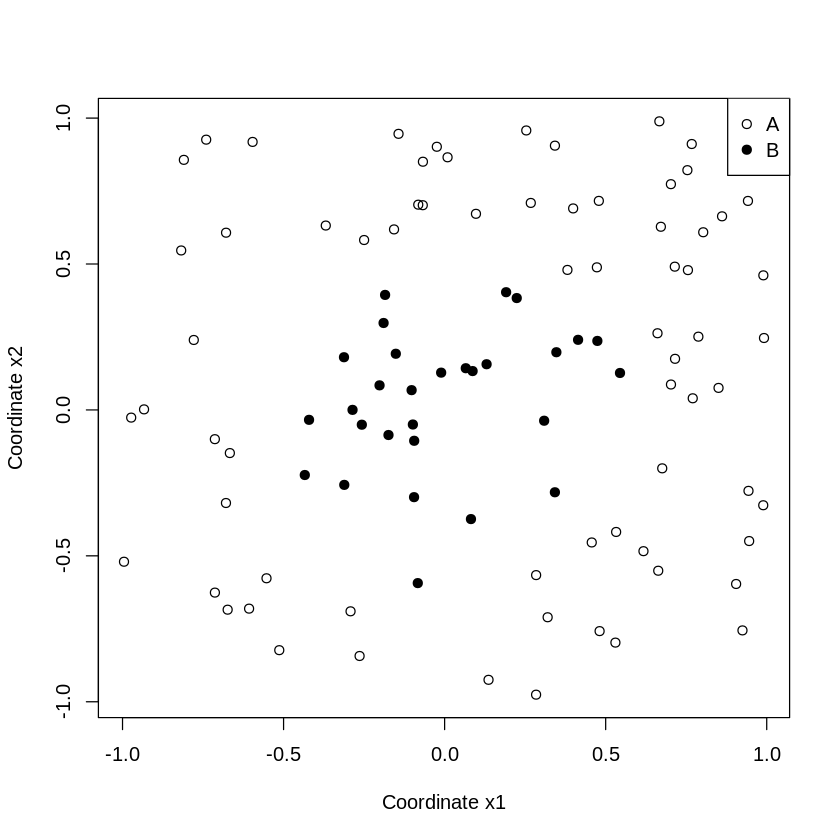

In [6]:
#::GMG:: Visualizo los datos
ind.A <- which(circle$y == 0)
ind.B <- which(circle$y == 1)
plot(circle$x1[ind.A],
     circle$x2[ind.A], 
     pch = 21, 
     xlab = "Coordinate x1", 
     ylab = "Coordinate x2")
points(circle$x1[ind.B],
       circle$x2[ind.B], 
       pch = 19)
legend("topright", 
       legend = c("A", "B"), 
       pch = c(21,19))

### Dataset MNIST

In [8]:
#::GMG:Cargo los datos
#::nota::lo mejor es cargarlos de una fuente remota original
#        http://yann.lecun.com/exdb/mnist/
#::nota::para eso se puede usar una biblioteca adicional dslabs
# https://rdrr.io/cran/dslabs/man/read_mnist.html
# que tarda unos segundos en hacerlo (dependiendo de la conexión)
mnist <- dslabs::read_mnist()

In [10]:
#::GMG::Describo los datos
str(object = mnist)

List of 2
 $ train:List of 2
  ..$ images: int [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:60000] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ images: int [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:10000] 7 2 1 0 4 1 4 9 5 9 ...


In [12]:
str(mnist$train)

List of 2
 $ images: int [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
 $ labels: int [1:60000] 5 0 4 1 9 2 1 3 1 4 ...


In [13]:
str(mnist$test)

List of 2
 $ images: int [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
 $ labels: int [1:10000] 7 2 1 0 4 1 4 9 5 9 ...


[1] 7

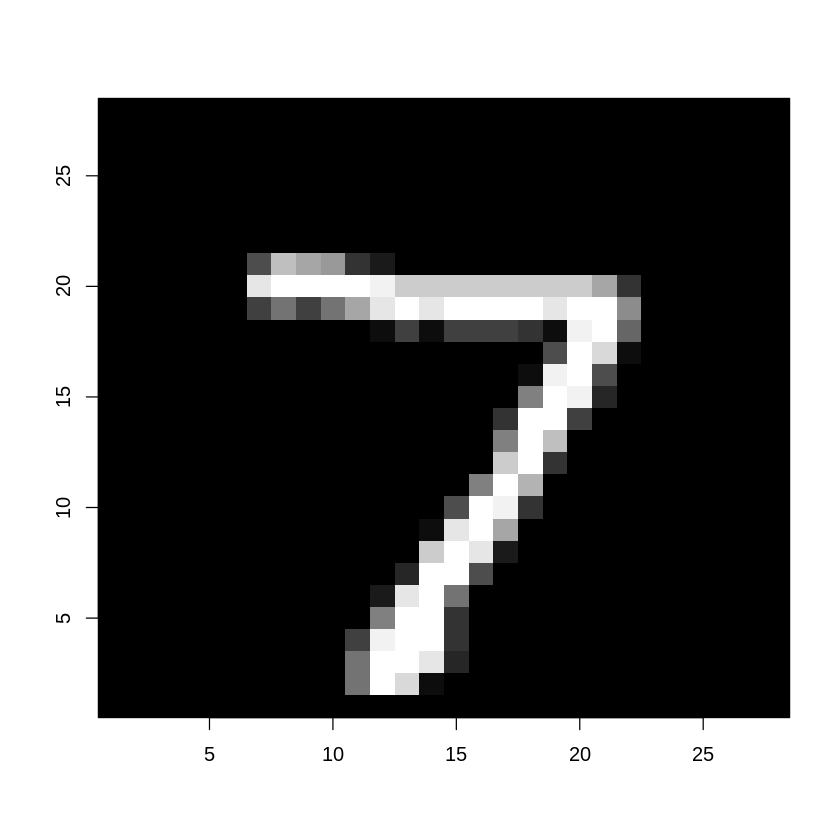

In [27]:
#::GMG::Una imagen de test de ejemplo
i <- 1
image(1:28, 1:28, matrix(mnist$test$images[i,], nrow=28)[ , 28:1], 
    col = gray(seq(0, 1, 0.05)), xlab = "", ylab="")
## the labels for this image is: 
mnist$test$labels[i]

## 3 Prueba de concepto con ELMR

In [ ]:
#::GMG::Prueba canónica propuesta por el profesor ebn clase con MNIST
# https://cran.r-project.org/web/packages/ELMR/ELMR.pdf
# https://www.rdocumentation.org/packages/ELMR/versions/1.0
modelo <- OSelm_train.formula(formula = y9~., 
                              data = datT, 
                              Elm_type = "classification", 
                              nHiddenNeurons = 200, 
                              ActivationFunction = "sig", 
                              N0 = 100, 
                              Block = 100)

In [ ]:
yy <- predict_elm(mod, datT)

In [ ]:
yy$accuracy.reg

## 4 Prueba de concepto con emlNNRcpp

## 5 Implementación manual (clase)

In [ ]:
activacion <- function(z) {
    1/(1 + exp(-z))
}

In [ ]:
#::GMG:: h <- xv, y <- hw (la segunda no hace falta pq lo hacemos con lm)
elm_train <- function(x,y,nhid = 1) {
    n_in <- ncol(x)
    n_out <- ncol(y)
    V <- matrix(runif(prod(n_out,nhid), min = -1, max = 1), nrow = 2, ncol = nhid)
    h <- activacion(x %*% V)
    df_ <- data.frame('y' = y, 'h' = h)
    model <- glm(formula = y ~ ., data = df_, family = binomial(link = 'logit'))
    list('model' = model, 'V' = V)
}

In [ ]:
m <- elm_train(cbind(df$x1,df$x2), df$y, nhid = 5)

In [ ]:
elm_predict <- function (x, m) {
    h <- as.data.frame(activacion(x %*% m$V))
    pred <- predict.glm(m$model, newdata = h, type = 'response')
    return (pred)
}

In [ ]:
p <- elm_predict(cbind(df$x1, df$x2), m)

In [ ]:
#::GMG::Calcular AUC (con umbral)
library ('verification')

In [ ]:
roc.plot(p)